In [80]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from sympy import *

style.use('ggplot')

# Задание 3

Исходная функция

In [56]:
x = symbols('x', real=True)

In [69]:
f = pow(abs(tan(x)), x) * sin(x) + 1 / 2
f

sin(x)*Abs(tan(x))**x + 0.5

Границы отрезка

In [40]:
a = -2
b = 1

Часть A. Численное интегрирование

Количество узлов

In [41]:
n = [15, 30, 60]

График исходной функции

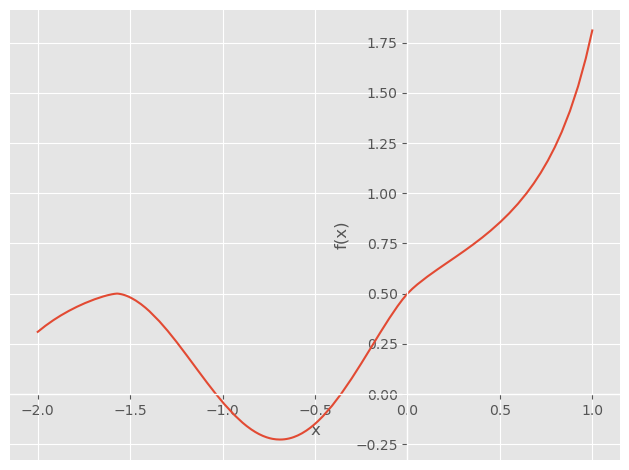

In [82]:
plot(f, (x, a, b))

Интегрирование функции с помощью вычислительного пакета Python

In [76]:
I_exact = Integral(f, (x, a, b)).as_sum(100).evalf()
I_exact


1.27435117595794

Численное интегрирование функци

In [44]:
Xs = []
Ys = []
for i in range(3):
    X = [0] * n[i]
    Y = [0] * n[i]
    for k in range(0, n[i]):
        X[k] = N(a + (b - a) / n[i] * k)
        Y[k] = N(f.subs(x, X[k]))
    Xs.append(X)
    Ys.append(Y)

In [45]:
I_apprs = []
for i in range(3):
    I_appr = N((b - a) / (2 * n[i]) * (f.subs(x, a) + f.subs(x, b) + 2 * sum(Ys[i])))
    I_apprs.append(I_appr)
I_apprs

[1.34846179244477, 1.30837941363464, 1.29069179714385]

Ошибка

In [77]:
for i in range(3):
    print(abs(I_apprs[i] - I_exact))

0.0741106164868395
0.0340282376767076
0.0163406211859125


Часть Б. Численное дифференцирование

Дифференцирование функции с помощью вычислительного пакета Python

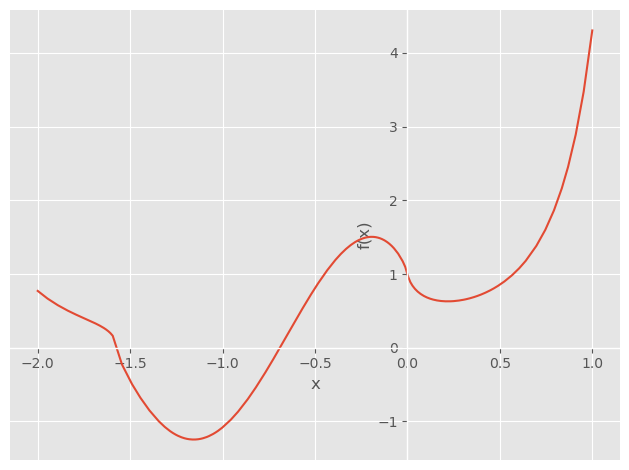

In [81]:
der_exact = f.diff(x)
plot(der_exact, (x, a, b))

Численное дифференцирование

In [85]:
n = 200
X = [0] * n
Y = [0] * n

for k in range(n):
    X[k] = N(a + (b - a) / n * k)
    Y[k] = N(f.subs(x, X[k]))

h = X[n - 1] - X[n - 2]

In [99]:
der_appr = [0] * (n - 2)

for k in range(1, n - 1):
    der_appr[k - 1] = (Y[k + 1] - Y[k - 1]) / (2 * h)

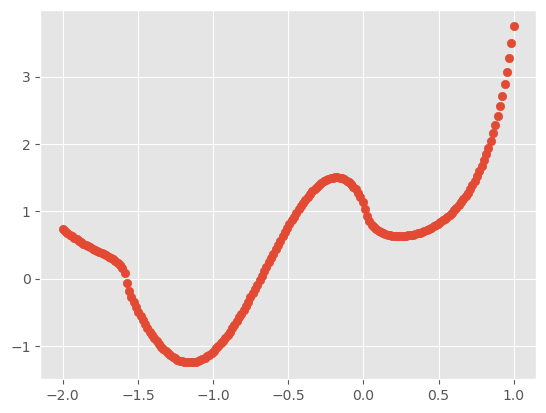

In [103]:
plt.scatter(np.linspace(a, b, n - 2), der_appr)
plt.show()